<a href="https://colab.research.google.com/github/Surabhi1303/Python/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [135]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [136]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [137]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [139]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df["Cancer"]=data.target

In [141]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [142]:
df.shape

(569, 31)

In [143]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [144]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 31 Text xticklabel objects>)

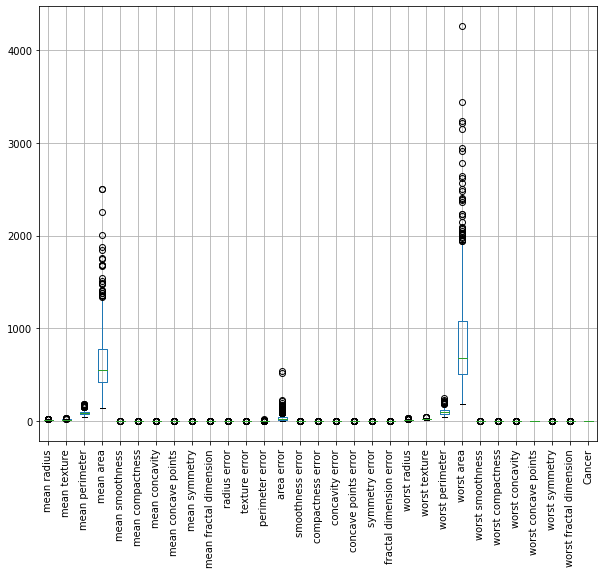

In [145]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.xticks(rotation=90)


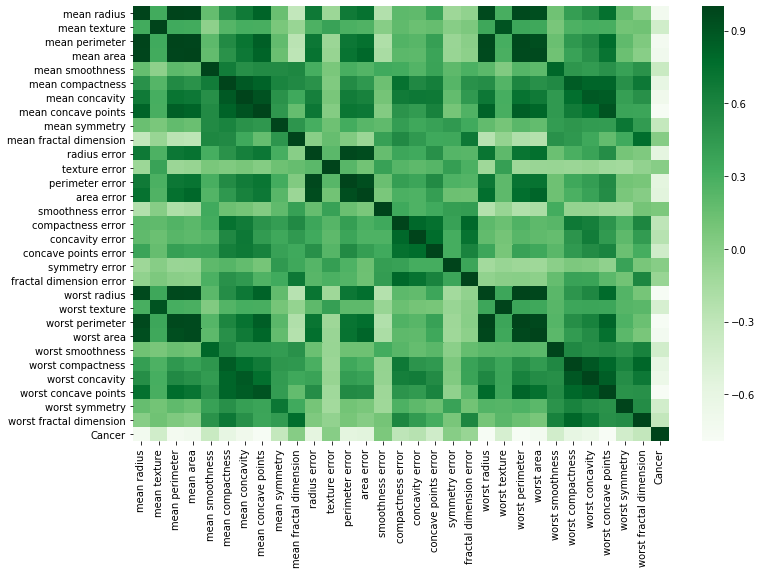

In [146]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="Greens")

In [147]:
abs(df.corr()["Cancer"]).sort_values()

symmetry error             0.006522
texture error              0.008303
mean fractal dimension     0.012838
smoothness error           0.067016
fractal dimension error    0.077972
concavity error            0.253730
compactness error          0.292999
worst fractal dimension    0.323872
mean symmetry              0.330499
mean smoothness            0.358560
concave points error       0.408042
mean texture               0.415185
worst symmetry             0.416294
worst smoothness           0.421465
worst texture              0.456903
area error                 0.548236
perimeter error            0.556141
radius error               0.567134
worst compactness          0.590998
mean compactness           0.596534
worst concavity            0.659610
mean concavity             0.696360
mean area                  0.708984
mean radius                0.730029
worst area                 0.733825
mean perimeter             0.742636
worst radius               0.776454
mean concave points        0

In [0]:
corr_cancer=abs(df.corr()["Cancer"]).sort_values()

In [149]:
corr_cancer>0.55

symmetry error             False
texture error              False
mean fractal dimension     False
smoothness error           False
fractal dimension error    False
concavity error            False
compactness error          False
worst fractal dimension    False
mean symmetry              False
mean smoothness            False
concave points error       False
mean texture               False
worst symmetry             False
worst smoothness           False
worst texture              False
area error                 False
perimeter error             True
radius error                True
worst compactness           True
mean compactness            True
worst concavity             True
mean concavity              True
mean area                   True
mean radius                 True
worst area                  True
mean perimeter              True
worst radius                True
mean concave points         True
worst perimeter             True
worst concave points        True
Cancer    

In [150]:
corr_cancer[corr_cancer>0.50]

area error              0.548236
perimeter error         0.556141
radius error            0.567134
worst compactness       0.590998
mean compactness        0.596534
worst concavity         0.659610
mean concavity          0.696360
mean area               0.708984
mean radius             0.730029
worst area              0.733825
mean perimeter          0.742636
worst radius            0.776454
mean concave points     0.776614
worst perimeter         0.782914
worst concave points    0.793566
Cancer                  1.000000
Name: Cancer, dtype: float64

In [151]:
interesting_col=corr_cancer[corr_cancer>0.55].index
interesting_col

Index(['perimeter error', 'radius error', 'worst compactness',
       'mean compactness', 'worst concavity', 'mean concavity', 'mean area',
       'mean radius', 'worst area', 'mean perimeter', 'worst radius',
       'mean concave points', 'worst perimeter', 'worst concave points',
       'Cancer'],
      dtype='object')

In [152]:
df2=df.loc[:,interesting_col]
df2.head()

,perimeter error,radius error,worst compactness,mean compactness,worst concavity,mean concavity,mean area,mean radius,worst area,mean perimeter,worst radius,mean concave points,worst perimeter,worst concave points,Cancer
0,8.589,1.0950,0.6656,0.27760,0.7119,0.3001,1001.0,17.99,2019.0,122.80,25.38,0.14710,184.60,0.2654,0
1,3.398,0.5435,0.1866,0.07864,0.2416,0.0869,1326.0,20.57,1956.0,132.90,24.99,0.07017,158.80,0.1860,0
2,4.585,0.7456,0.4245,0.15990,0.4504,0.1974,1203.0,19.69,1709.0,130.00,23.57,0.12790,152.50,0.2430,0
3,3.445,0.4956,0.8663,0.28390,0.6869,0.2414,386.1,11.42,567.7,77.58,14.91,0.10520,98.87,0.2575,0
4,5.438,0.7572,0.2050,0.13280,0.4000,0.1980,1297.0,20.29,1575.0,135.10,22.54,0.10430,152.20,0.1625,0


In [153]:
X=df2.drop(columns=["Cancer"])
Y=df2[['Cancer']]
print(X)
Y

     perimeter error  radius error  ...  worst perimeter  worst concave points
0              8.589        1.0950  ...           184.60                0.2654
1              3.398        0.5435  ...           158.80                0.1860
2              4.585        0.7456  ...           152.50                0.2430
3              3.445        0.4956  ...            98.87                0.2575
4              5.438        0.7572  ...           152.20                0.1625
..               ...           ...  ...              ...                   ...
564            7.673        1.1760  ...           166.10                0.2216
565            5.203        0.7655  ...           155.00                0.1628
566            3.425        0.4564  ...           126.70                0.1418
567            5.772        0.7260  ...           184.60                0.2650
568            2.548        0.3857  ...            59.16                0.0000

[569 rows x 14 columns]


,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [0]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X=mms.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)


In [156]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((455, 14), (114, 14), (455, 1), (114, 1))

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [158]:
lr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
Y_pred=lr.predict(X_test)
print(Y_pred)
print(Y_test)

[0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1
 1 1 0]
     Cancer
72        0
241       1
507       1
44        0
151       1
..      ...
189       1
176       1
100       0
340       1
446       0

[114 rows x 1 columns]


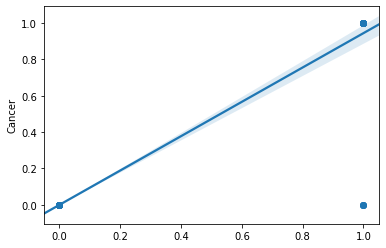

In [160]:
#Y_PRED=pd.DataFrame(data=Y_pred,columns=["Pred_Cancer"])
#print(Y_PRED)
sns.regplot(Y_pred,Y_test.Cancer)

In [161]:
(Y_pred == Y_test.Cancer).mean()

0.9649122807017544

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_test.Cancer,Y_pred)

0.9649122807017544

In [165]:
confusion_matrix(Y_test.Cancer,Y_pred)

array([[42,  4],
       [ 0, 68]])